In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats
# multivariate linear regression with regularization
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

# support vector machine regression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
# neural network
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional, BatchNormalization
# normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
# score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV, RandomizedSearchCV
# import keras
import tensorflow.keras
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.layers import Activation
from tensorflow.keras import backend as K
# import regularizer
from tensorflow.keras.regularizers import l1, l2
# import matplotlib
import matplotlib.pyplot as plt
# os
# randomseed

from numpy.random import seed
from numpy import asarray
from numpy import savetxt
###############################3
import os
import pickle
from calendar import monthrange

In [2]:
Rootmean=tensorflow.keras.metrics.RootMeanSquaredError()

In [3]:
inputphayao=pd.read_excel('input3.xlsx')
tempphayao=pd.read_excel('cm_met_Phayao.xlsx',sheet_name='Temperature')
phenophayao=pd.read_excel('cm_met_Phayao.xlsx',sheet_name='Phenomena')
humidphayao=pd.read_excel('cm_met_Phayao.xlsx',sheet_name='Humidity')
rainphayao=pd.read_excel('cm_met_Phayao.xlsx',sheet_name='Rainfall')
pressphayao=pd.read_excel('cm_met_Phayao.xlsx',sheet_name='Pressure')
Y_phayao=inputphayao.iloc[1:,3]

In [4]:
print(rainphayao.columns)

Index(['Elements', 'Unnamed: 1', 'N-Years', 'JAN', 'FEB', 'MAR', 'APR', 'MAY',
       'JUN', 'JUL',
       ...
       'APR.11', 'MAY.11', 'JUN.11', 'JUL.11', 'AUG.11', 'SEP.11', 'OCT.11',
       'NOV.11', 'DEC.11', 'Annual.11'],
      dtype='object', length=192)


In [5]:
rainphayao= rainphayao.drop(['Elements', 'Unnamed: 1', 'N-Years','Elements.1', 'Unnamed: 17', 'N-Years.1','Elements.2', 'Unnamed: 33', 'N-Years.2','Elements.3', 'Unnamed: 49', 'N-Years.3','Elements.4', 'Unnamed: 65', 'N-Years.4',], axis=1)
rainphayao= rainphayao.drop(['Elements.5', 'Unnamed: 81', 'N-Years.5','Elements.6', 'Unnamed: 97', 'N-Years.6','Elements.7', 'Unnamed: 113', 'N-Years.7','Elements.8', 'Unnamed: 129', 'N-Years.8','Elements.9', 'Unnamed: 145', 'N-Years.9',], axis=1)
rainphayao= rainphayao.drop(['Elements.10', 'Unnamed: 161', 'N-Years.10','Elements.11', 'Unnamed: 177', 'N-Years.11',], axis=1)


In [6]:
rainphayao=rainphayao.replace('-',0)

In [7]:
rainphayao=rainphayao.to_numpy()
tempphayao=tempphayao.to_numpy()
humidphayao=humidphayao.to_numpy()
pressphayao=pressphayao.to_numpy()
phenophayao=phenophayao.to_numpy()
Y_phayao=Y_phayao.to_numpy()

In [8]:
tempphayao=tempphayao[0,1:]
rainphayao=rainphayao[0,:]
humidphayao=humidphayao[0,1:]
pressphayao=pressphayao[0,1:]
phenophayao=phenophayao[3,1:]


In [9]:
rainphayao=rainphayao.reshape(12,13)
tempphayao=tempphayao.reshape(12,13)
humidphayao=humidphayao.reshape(12,13)
pressphayao=pressphayao.reshape(12,13)
phenophayao=phenophayao.reshape(12,13)


In [10]:
rainphayao=np.delete(rainphayao,12,1)
tempphayao=np.delete(tempphayao,12,1)
humidphayao=np.delete(humidphayao,12,1)
pressphayao=np.delete(pressphayao,12,1)
phenophayao=np.delete(phenophayao,12,1)


In [11]:
inputphayao=inputphayao.to_numpy()

In [12]:
X_phayao=inputphayao[1:,0:3]
X_phayao=np.concatenate((tempphayao[:,0:2],X_phayao,),axis=1)
X_phayao=np.concatenate((X_phayao,phenophayao[:,0:2]),axis=1)
X_phayao=np.concatenate((X_phayao,rainphayao[:,2:4]),axis=1)
X_phayao=np.concatenate((X_phayao,humidphayao[:,0:2]),axis=1)
X_phayao=np.concatenate((X_phayao,pressphayao[:,0:2]),axis=1)

In [13]:
X_phayao=np.delete(X_phayao,9,0)
Y_phayao=np.delete(Y_phayao,9,0)

In [14]:
print(X_phayao)

[[29.2 31.7 292 35 23538 0 0 1.1 195.4 74 66 1014.79 1011.86]
 [30.0 30.6 294 25 22956 0 1 15.3 51.8 76 71 1012.31 1011.24]
 [28.4 33.2 276 21 21572 0 0 12.3 49.1 75 69 1014.8 1009.1]
 [30.6 33.8 322 24 20738 2 0 27.9 57.6 75 63 1013.2 1010.7]
 [28.8 32.4 271 12 20367 0 0 68.0 171.3 72 66 1012.3 1009.9]
 [30.4 33.2 281 10 16672 0 0 44.5 87.4 76 67 1012.26 1009.0]
 [30.1 32.3 252 47 15855 1 4 13.5 10.6 76 75 1013.2 1011.5]
 [27.7 32.2 287 1 15814 0 0 20.5 39.0 78 66 1016.1 1010.6]
 [27.2 31.5 247 22 15814 0 0 43.2 69.7 79 69 1015.7 1012.8]
 [27.8 32.4 319 17 14942 0 0 0.6 97.0 86 71 1014.4 1013.1]
 [28.9 31.7 294 22 12120 0 2 32.5 200.6 82 75 1011.9 1012.4]]


In [15]:
Y_phayao.shape
#X_phayao.shape


(11,)

In [16]:
T_phayao=X_phayao

In [17]:
################################FeatureSelection##############################################
X_phayao=X_phayao[:,[2,3,4,5,6,7,8,9,10,11,12]]

In [18]:
Tmp=X_phayao

In [19]:
def rmse(y_true, y_pred):

    ind_ignorezero = (y_true != 0).reshape(-1,)
    error = (y_true - y_pred)
    se = error**2
    mse = np.mean(se)
    rmse = mse**0.5
    return rmse
def mape(y_true, y_pred):
    error = y_true - y_pred
    pe     = (y_true - y_pred)/y_true*100
    ape = np.abs(pe)
    mape = np.mean(ape)

    return mape  
def mae(y_true, y_pred):

    error = y_true - y_pred
    ae = np.abs(error)
    mae = np.mean(ae)

    return mae

In [20]:
n_size=X_phayao.shape[0]

X_train, X_test, Y_train, Y_test =  train_test_split(X_phayao, Y_phayao, test_size=0.3)
X_train_ord = X_phayao[:int(n_size*(1-0.3)), :]
X_test_ord  = X_phayao[int(n_size*(1-0.3)):, :]
Y_train_ord = Y_phayao[:int(n_size*(1-0.3))]
Y_test_ord  = Y_phayao[int(n_size*(1-0.3)):]

In [21]:
train_mae = np.array([])
test_mae = np.array([])

train_rmse = np.array([])
test_rmse = np.array([])
train_mape = np.array([])
test_mape = np.array([])
scaler=MinMaxScaler()
scaler.fit(X_train_ord)
lin_reg = LinearRegression()
lin_reg.fit(X_train_ord, np.log1p(Y_train_ord))
Y_all_test = lin_reg.predict(X_phayao)
Y_all_test[Y_all_test<0] = 0

Y_all_test = np.expm1(Y_all_test)

train_mae = mae(Y_phayao[:int(n_size*(1-0.3))], Y_all_test[:int(n_size*(1-0.3))])
test_mae = mae(Y_phayao[int(n_size*(1-0.3)):], Y_all_test[int(n_size*(1-0.3)):])

train_rmse = rmse(Y_phayao[:int(n_size*(1-0.3))], Y_all_test[:int(n_size*(1-0.3))])
test_rmse = rmse(Y_phayao[int(n_size*(1-0.3)):], Y_all_test[int(n_size*(1-0.3)):])

train_mape = mape(Y_phayao[:int(n_size*(1-0.3))], Y_all_test[:int(n_size*(1-0.3))])
test_mape = mape(Y_phayao[int(n_size*(1-0.3)):], Y_all_test[int(n_size*(1-0.3)):])

print('train MAE {:.2f}\ttest MAE {:.2f}'.format(train_mae, test_mae))
print('train RMSE {:.2f}\ttest RMSE {:.2f}'.format(train_rmse, test_rmse))
print('train MAPE {:.2f}\ttest MAPE {:.2f}'.format(train_mape, test_mape))
print('=========================')

train MAE 0.00	test MAE 3487.94
train RMSE 0.00	test RMSE 4843.43
train MAPE 0.00	test MAPE 39.31


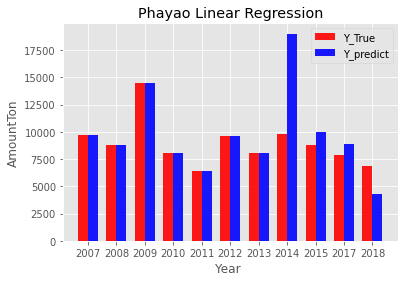

In [22]:
plt.style.use('ggplot')
n = 11

fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.35
opacity = 0.9
ax.bar(index, Y_phayao, bar_width, alpha=opacity, color='r',
                label='Y_True')
ax.bar(index+bar_width, Y_all_test, bar_width, alpha=opacity, color='b',
                label='Y_predict')
ax.set_xlabel('Year ')
ax.set_ylabel('AmountTon')
ax.set_title('Phayao Linear Regression')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('2007','2008','2009','2010','2011','2012','2013','2014','2015','2017','2018'
    ))
ax.legend()
plt.show()

In [23]:
tensorflow.random.set_seed(0)

In [24]:
reg = l1(0.02)
neural2 = Sequential()
scaler=MinMaxScaler()
    # input layer
neural2.add(Dense(256, activation='relu', input_dim=X_phayao.shape[1]))
    # hidden layer
neural2.add(Dropout(0.2))
neural2.add(Dense(512, activation='relu',kernel_regularizer=reg)) 
neural2.add(Dropout(0.2))
neural2.add(Dense(512, activation='relu',kernel_regularizer=reg))   
neural2.add(Dropout(0.2))
neural2.add(Dense(512, activation='relu',kernel_regularizer=reg))
neural2.add(Dropout(0.2))   
neural2.add(Dense(512, activation='relu',kernel_regularizer=reg))  
# output layer
neural2.add(Dense(1, activation='relu'))
neural2.compile(optimizer='adam', loss='mse',metrics=[Rootmean, 'mae', 'mape'])

In [25]:
Y_train_ord.shape

(7,)

In [26]:
X_train_ord=K.constant(X_train_ord)
Y_train_ord=K.constant(Y_train_ord)
X_test_ord=K.constant(X_test_ord)
Y_test_ord=K.constant(Y_test_ord)
X_phayao=K.constant(X_phayao)

In [27]:
scaler.fit(X_train_ord)
neural2.fit(X_train_ord,Y_train_ord,epochs=100, verbose=1, batch_size=32)

Train on 7 samples
Epoch 1/100
7/7 [==============================] - 3s 391ms/sample - loss: 92003280.0000 - root_mean_squared_error: 9591.7969 - mae: 9296.0000 - mape: 100.0000
Epoch 2/100
7/7 [==============================] - 0s 2ms/sample - loss: 92003256.0000 - root_mean_squared_error: 9591.7969 - mae: 9296.0000 - mape: 100.0000
Epoch 3/100
7/7 [==============================] - 0s 3ms/sample - loss: 91871536.0000 - root_mean_squared_error: 9584.9287 - mae: 9289.1758 - mape: 99.9295
Epoch 4/100
7/7 [==============================] - 0s 3ms/sample - loss: 84889224.0000 - root_mean_squared_error: 9213.4990 - mae: 8872.8330 - mape: 95.0495
Epoch 5/100
7/7 [==============================] - 0s 2ms/sample - loss: 48715560.0000 - root_mean_squared_error: 6979.6060 - mae: 6603.3813 - mape: 69.9019
Epoch 6/100
7/7 [==============================] - 0s 1ms/sample - loss: 15696682.0000 - root_mean_squared_error: 3961.8218 - mae: 3327.1814 - mape: 33.0029
Epoch 7/100
7/7 [==================

In [28]:
y_neural=neural2.predict(X_phayao)

In [29]:
print(y_neural)

[[11076.998 ]
 [10849.053 ]
 [10213.745 ]
 [ 9828.803 ]
 [ 9623.3545]
 [ 7952.9155]
 [ 7600.245 ]
 [ 7575.3457]
 [ 7564.2505]
 [ 7162.232 ]
 [ 5834.4614]]


In [30]:
y_neural=y_neural.reshape(11,)

In [31]:
accuracy=neural2.evaluate(X_train_ord, Y_train_ord)

7/1 [==================================================================================================================================================================================================================] - 0s 53ms/sample - loss: 5876921.0000 - root_mean_squared_error: 2424.1318 - mae: 2125.6147 - mape: 23.3405


In [32]:
accuracy=neural2.evaluate(X_test_ord, Y_test_ord) 

4/1 [========================================================================================================================] - 0s 2ms/sample - loss: 2055656.1250 - root_mean_squared_error: 1433.5796 - mae: 1321.4279 - mape: 15.4272


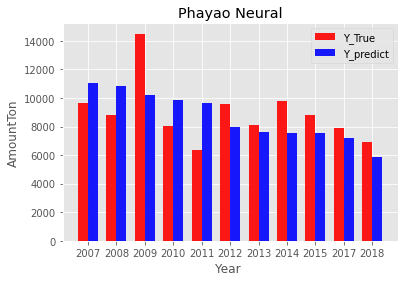

In [33]:
plt.style.use('ggplot')
n = 11

fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.35
opacity = 0.9
ax.bar(index, Y_phayao, bar_width, alpha=opacity, color='r',
                label='Y_True')
ax.bar(index+bar_width, y_neural, bar_width, alpha=opacity, color='b',
                label='Y_predict')
ax.set_xlabel('Year ')
ax.set_ylabel('AmountTon')
ax.set_title('Phayao Neural')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('2007','2008','2009','2010','2011','2012','2013','2014','2015','2017','2018'
    ))
ax.legend()
plt.show()

In [34]:
###############################################RNN#######################################################

In [35]:
X_phayao=Tmp

In [36]:
print(X_phayao)

[[292 35 23538 0 0 1.1 195.4 74 66 1014.79 1011.86]
 [294 25 22956 0 1 15.3 51.8 76 71 1012.31 1011.24]
 [276 21 21572 0 0 12.3 49.1 75 69 1014.8 1009.1]
 [322 24 20738 2 0 27.9 57.6 75 63 1013.2 1010.7]
 [271 12 20367 0 0 68.0 171.3 72 66 1012.3 1009.9]
 [281 10 16672 0 0 44.5 87.4 76 67 1012.26 1009.0]
 [252 47 15855 1 4 13.5 10.6 76 75 1013.2 1011.5]
 [287 1 15814 0 0 20.5 39.0 78 66 1016.1 1010.6]
 [247 22 15814 0 0 43.2 69.7 79 69 1015.7 1012.8]
 [319 17 14942 0 0 0.6 97.0 86 71 1014.4 1013.1]
 [294 22 12120 0 2 32.5 200.6 82 75 1011.9 1012.4]]


In [37]:
X_phayao_RNN=X_phayao.reshape(X_phayao.shape[0],1,X_phayao.shape[1])

In [38]:
n_size=X_phayao.shape[0]

X_train, X_test, Y_train, Y_test =  train_test_split(X_phayao, Y_phayao, test_size=0.3)
X_train_ord = X_phayao_RNN[:int(n_size*(1-0.3)), :,:]
X_test_ord  = X_phayao_RNN[int(n_size*(1-0.3)):, :,:]
Y_train_ord = Y_phayao[:int(n_size*(1-0.3))]
Y_test_ord  = Y_phayao[int(n_size*(1-0.3)):]

In [39]:
print(X_train)

[[294 25 22956 0 1 15.3 51.8 76 71 1012.31 1011.24]
 [276 21 21572 0 0 12.3 49.1 75 69 1014.8 1009.1]
 [294 22 12120 0 2 32.5 200.6 82 75 1011.9 1012.4]
 [322 24 20738 2 0 27.9 57.6 75 63 1013.2 1010.7]
 [252 47 15855 1 4 13.5 10.6 76 75 1013.2 1011.5]
 [281 10 16672 0 0 44.5 87.4 76 67 1012.26 1009.0]
 [319 17 14942 0 0 0.6 97.0 86 71 1014.4 1013.1]]


In [40]:
#scaler.fit(X_train_ord)
Xtrain=K.constant(X_train)
Y_train=K.constant(Y_train)
X_test=K.constant(X_test)
Y_test=K.constant(Y_test)
Y_train=K.constant(Y_train)
X_train_ord=K.constant(X_train_ord)
Y_train_ord=K.constant(Y_train_ord)
X_test_ord=K.constant(X_test_ord)
Y_test_ord=K.constant(Y_test_ord)
X_phayao_RNN=K.constant(X_phayao_RNN)

In [41]:
plt.style.use('ggplot')
n = 11

fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.35
opacity = 0.9
ax.bar(index, Y_phayao, bar_width, alpha=opacity, color='r',
                label='Y_True')
ax.bar(index+bar_width, y_pred, bar_width, alpha=opacity, color='b',
                label='Y_predict')
ax.set_xlabel('Year ')
ax.set_ylabel('AmountTon')
ax.set_title('Y_Phayao LSTM')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('2007','2008','2009','2010','2011','2012','2013','2014','2015','2017','2018'
    ))
ax.legend()
plt.show()

NameError: name 'y_pred' is not defined

In [42]:
rnn_LSTM2 = Sequential()
rnn_LSTM2.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(X_phayao_RNN.shape[1],X_phayao_RNN.shape[2])))
rnn_LSTM2.add(Dropout(0.2))
rnn_LSTM2.add(LSTM(512, activation='relu',return_sequences=True))
rnn_LSTM2.add(Dropout(0.2))
rnn_LSTM2.add(LSTM(512, activation='relu',return_sequences=True))
rnn_LSTM2.add(Dropout(0.2))
#rnn_LSTM2.add(LSTM(50, activation='relu',return_sequences=True))
rnn_LSTM2.add(Dropout(0.2))
rnn_LSTM2.add(Dense(512, activation='relu'))
#rnn_LSTM.add(Dropout(0.2))
rnn_LSTM2.add(Dense(1, activation='relu'))
rnn_LSTM2.compile(optimizer='adam', loss='mse',metrics=[Rootmean, 'mae', 'mape'])

In [43]:
rnn_LSTM2.fit(X_train_ord,Y_train_ord,epochs=100, verbose=1, batch_size=32)

Train on 7 samples
Epoch 1/100
7/7 [==============================] - 6s 866ms/sample - loss: 91814184.0000 - root_mean_squared_error: 9581.9717 - mae: 9283.8311 - mape: 99.8381
Epoch 2/100
7/7 [==============================] - 0s 5ms/sample - loss: 91465384.0000 - root_mean_squared_error: 9563.7539 - mae: 9267.2363 - mape: 99.6798
Epoch 3/100
7/7 [==============================] - 0s 5ms/sample - loss: 90557752.0000 - root_mean_squared_error: 9516.1836 - mae: 9220.2754 - mape: 99.1557
Epoch 4/100
7/7 [==============================] - 0s 4ms/sample - loss: 89357608.0000 - root_mean_squared_error: 9452.9150 - mae: 9151.7959 - mape: 98.3671
Epoch 5/100
7/7 [==============================] - 0s 4ms/sample - loss: 87128264.0000 - root_mean_squared_error: 9334.2520 - mae: 9034.1143 - mape: 97.0550
Epoch 6/100
7/7 [==============================] - 0s 4ms/sample - loss: 84349520.0000 - root_mean_squared_error: 9184.1992 - mae: 8869.4580 - mape: 95.1093
Epoch 7/100
7/7 [====================

In [44]:
y_pred=rnn_LSTM2.predict(X_phayao_RNN)
y_pred=y_pred.reshape(11,)

In [45]:
accuracy=rnn_LSTM2.evaluate(X_train_ord, Y_train_ord)

7/1 [==================================================================================================================================================================================================================] - 1s 128ms/sample - loss: 7482708.5000 - root_mean_squared_error: 2735.4541 - mae: 1891.7556 - mape: 18.3765


In [46]:
accuracy=rnn_LSTM2.evaluate(X_test_ord, Y_test_ord)

4/1 [========================================================================================================================] - 0s 6ms/sample - loss: 7018552.5000 - root_mean_squared_error: 2649.2551 - mae: 2574.5859 - mape: 30.4917


In [47]:
rnn_Gru = Sequential()
rnn_Gru.add(GRU(20, activation='relu', return_sequences=True, input_shape=(X_phayao_RNN.shape[1],X_phayao_RNN.shape[2])))

#rnn_Gru.add(GRU(50, activation='relu', return_sequences=True))

rnn_Gru.add(GRU(100, activation='relu',return_sequences=True))
rnn_Gru.add(Dropout(0.4))    
rnn_Gru.add(GRU(100, activation='relu',return_sequences=True))
rnn_Gru.add(Dropout(0.4))
rnn_Gru.add(GRU(100, activation='relu',return_sequences=True))    
#rnn_Gru.add(GRU(100, activation='relu',return_sequences=True))     
    # rnn.add(BatchNormalization())    
rnn_Gru.add(Dropout(0.4))
rnn_Gru.add(Dense(50, activation='relu'))
#GruChiangmai.add(Dropout(0.4))    
rnn_Gru.add(Dense(1, activation='relu'))
rnn_Gru.compile(optimizer='adam', loss='mse',metrics=['mae', Rootmean, 'mape'])

In [48]:
rnn_Gru.fit(X_train_ord,Y_train_ord,epochs=100, verbose=1, batch_size=32)

Train on 7 samples
Epoch 1/100
7/7 [==============================] - 9s 1s/sample - loss: 91284992.0000 - mae: 9262.4326 - root_mean_squared_error: 9554.3184 - mape: 99.6432
Epoch 2/100
7/7 [==============================] - 0s 4ms/sample - loss: 91321872.0000 - mae: 9251.5059 - root_mean_squared_error: 9556.2480 - mape: 99.4193
Epoch 3/100
7/7 [==============================] - 0s 4ms/sample - loss: 90860648.0000 - mae: 9255.6924 - root_mean_squared_error: 9532.0850 - mape: 99.7161
Epoch 4/100
7/7 [==============================] - 0s 4ms/sample - loss: 91388200.0000 - mae: 9266.4512 - root_mean_squared_error: 9559.7178 - mape: 99.6787
Epoch 5/100
7/7 [==============================] - 0s 3ms/sample - loss: 90954440.0000 - mae: 9242.5234 - root_mean_squared_error: 9537.0039 - mape: 99.4251
Epoch 6/100
7/7 [==============================] - 0s 3ms/sample - loss: 90610488.0000 - mae: 9231.7031 - root_mean_squared_error: 9518.9541 - mape: 99.3299
Epoch 7/100
7/7 [=======================

In [49]:
accuracy=rnn_Gru.evaluate(X_train_ord, Y_train_ord)

7/1 [==================================================================================================================================================================================================================] - 1s 140ms/sample - loss: 6278993.0000 - mae: 1982.6912 - root_mean_squared_error: 2505.7920 - mape: 20.5037


In [50]:
accuracy=rnn_Gru.evaluate(X_test_ord, Y_test_ord)

4/1 [========================================================================================================================] - 0s 3ms/sample - loss: 5222554.0000 - mae: 2208.8516 - root_mean_squared_error: 2285.2908 - mape: 26.1551


In [51]:
y_pred2=rnn_Gru.predict(X_phayao_RNN)

In [52]:
y_pred2=y_pred2.reshape(11,)

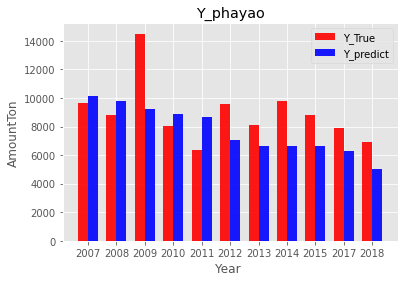

In [53]:
plt.style.use('ggplot')
n = 11

fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.35
opacity = 0.9
ax.bar(index, Y_phayao, bar_width, alpha=opacity, color='r',
                label='Y_True')
ax.bar(index+bar_width, y_pred2, bar_width, alpha=opacity, color='b',
                label='Y_predict')
ax.set_xlabel('Year ')
ax.set_ylabel('AmountTon')
ax.set_title('Y_phayao')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('2007','2008','2009','2010','2011','2012','2013','2014','2015','2017','2018'
    ))
ax.legend()
plt.show()